# Heart Disease Prediction

In [1]:
# Importing needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
# Upload dataset
data = pd.read_excel("Coursework Heart Failure Dataset.xlsx")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
128,54,F,ATA,120,230,1,Normal,140,N,0.0,Up,0
832,51,M,NAP,94,227,0,Normal,154,Y,0.0,Up,0
92,52,F,ATA,120,210,0,Normal,148,N,0.0,Up,0
81,54,M,ATA,120,238,0,Normal,154,N,0.0,Up,0
537,74,M,ASY,150,258,1,ST,130,Y,4.0,Down,1


In [4]:
# Checking data types and missing info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


No missing data and all datatypes as expected but need to encode categorical columns

In [5]:
# Encoding categorical columns using label encoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['ChestPainType'] = le.fit_transform(data['ChestPainType'])
data['RestingECG'] = le.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = le.fit_transform(data['ST_Slope'])

In [6]:
# Checking data types after encoding
data.dtypes

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object

All datatypes now as wanted

In [7]:
# Check duplicates
len(data)-len(data.drop_duplicates())

0

No duplicate data

In [8]:
# Check numerical fields
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


- Resting blood pressure - has value at 0, assuming this should be na as unlikely patient would be alive
- Cholesterol - has values at 0, assuming this should be na as can't have cholesterol level of 0 as body naturally synthesises. Assuming is a large amount as test often not done due to often needing to fast beforehand

In [9]:
# Checking amount of rows with resting bp value of 0
data.loc[data['RestingBP'] == 0].shape[0]

1

In [10]:
# Checking amount of rows with cholesterol value of 0
data.loc[data['Cholesterol'] == 0].shape[0]

172

In [11]:
# Replacing RestingBP zeros with mean
data['RestingBP'] = data['RestingBP'].replace(0, round(data['RestingBP'].mean(), 0))

In [12]:
# Replacing Cholesterol zeros with mean
data['Cholesterol'] = data['Cholesterol'].replace(0, round(data['Cholesterol'].mean(), 0))

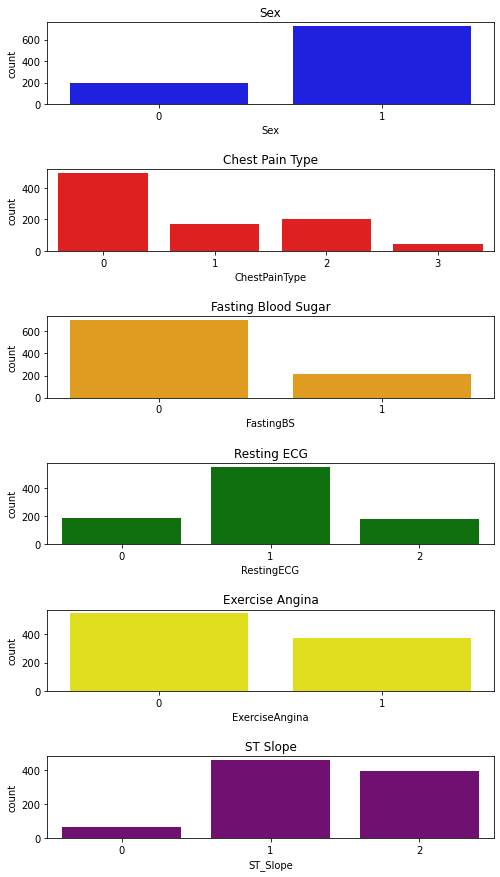

In [13]:
# Count plots to check categorical fields
fig, axes = plt.subplots(6, figsize = (8,15))
f1 = sns.countplot(data['Sex'], ax=axes[0], color = 'blue')
f1.set_title("Sex")
f2 = sns.countplot(data['ChestPainType'], ax=axes[1], color = 'red')
f2.set_title("Chest Pain Type")
f3 = sns.countplot(data['FastingBS'], ax=axes[2], color = 'orange')
f3.set_title("Fasting Blood Sugar")
f4 = sns.countplot(data['RestingECG'], ax=axes[3], color = 'green')
f4.set_title("Resting ECG")
f5 = sns.countplot(data['ExerciseAngina'], ax=axes[4], color = 'yellow')
f5.set_title("Exercise Angina")
f6 = sns.countplot(data['ST_Slope'], ax=axes[5], color = 'purple')
f6.set_title("ST Slope")
plt.subplots_adjust(hspace=0.8)
plt.show()

About categorical values:
- Sex - 0: Female, 1: Male
- ChestPainType - 0:ASY (Asymptomatic), 1: ATA (Atypical), 2: NAP (Non-Anginal Pain), 3: TA (Typical Angina)
- FastingBS - 0: Otherwise, 1: BS > 120mg/dl
- RestingECG - 0: LVH (Left Ventricular Hypertrophy), 1: Normal, 2: ST (Abnormal ST Wave)
- ExerciseAngina - 0: No, 1: Yes
- ST_Slope - 0: Down Sloping, 1: Flat, 2: Up Sloping
- HeartDisease - 0: Normal, 1: Heart Disease

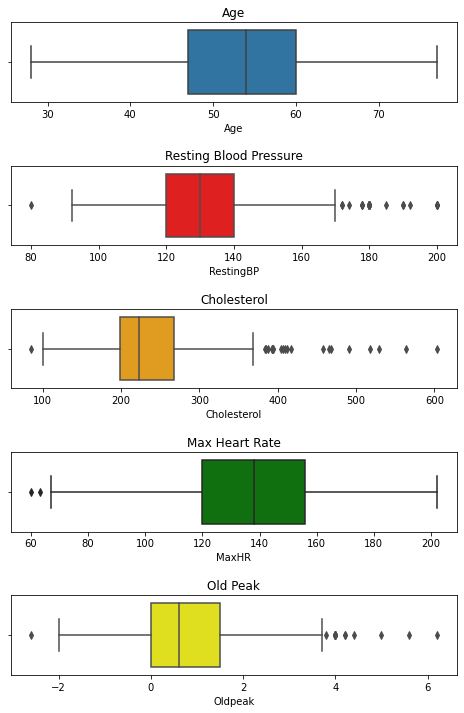

In [14]:
# Box plots to check for outliers in numerical fields
fig, axes = plt.subplots(5, figsize = (8,12))
f1 = sns.boxplot(data['Age'], ax=axes[0])
f1.set_title("Age")
f2 = sns.boxplot(data['RestingBP'], ax=axes[1], color = 'red')
f2.set_title("Resting Blood Pressure")
f3 = sns.boxplot(data['Cholesterol'], ax=axes[2], color = 'orange')
f3.set_title("Cholesterol")
f4 = sns.boxplot(data['MaxHR'], ax=axes[3], color = 'green')
f4.set_title("Max Heart Rate")
f5 = sns.boxplot(data['Oldpeak'], ax=axes[4], color = 'yellow')
f5.set_title("Old Peak")
plt.subplots_adjust(hspace=0.8)
plt.show()

- Age - no outliers
- Resting blood pressure - all outliers could be true results, so would be inaccurate to remove/replace
- Cholesterol - all outliers could be true results, so would be inaccurate to remove/replace
- Max heart rate - outliers around 60 but could be valid results, so would be inaccurate to remove/replace
- Old peak - all outliers could be true results, so would be inaccurate to remove/replace

In [15]:
# Check balance of target field
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

[Text(0.5, 1.0, 'Target Class Imbalance')]

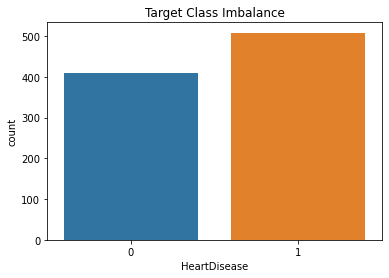

In [16]:
# Graph showing balance of target field
imbalance_graph = sns.countplot(data["HeartDisease"])
imbalance_graph.set(title="Target Class Imbalance")

Data is not too imbalanced, so no class imbalance solutions need to be applied

<AxesSubplot:>

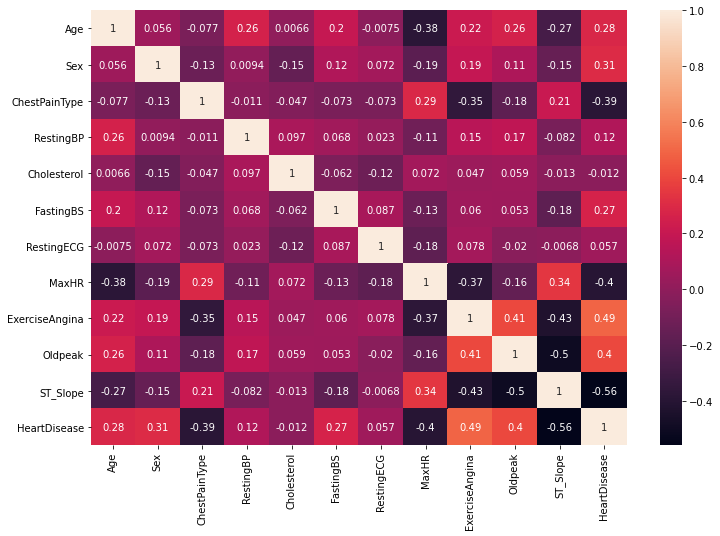

In [17]:
# Correlation heatmap to checkk multicollinearity
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot = True)

The fields with the highest correlation with heart disease are 'MaxHR' and 'Oldpeak'

No feature fields seem to be too closely correlated to each other

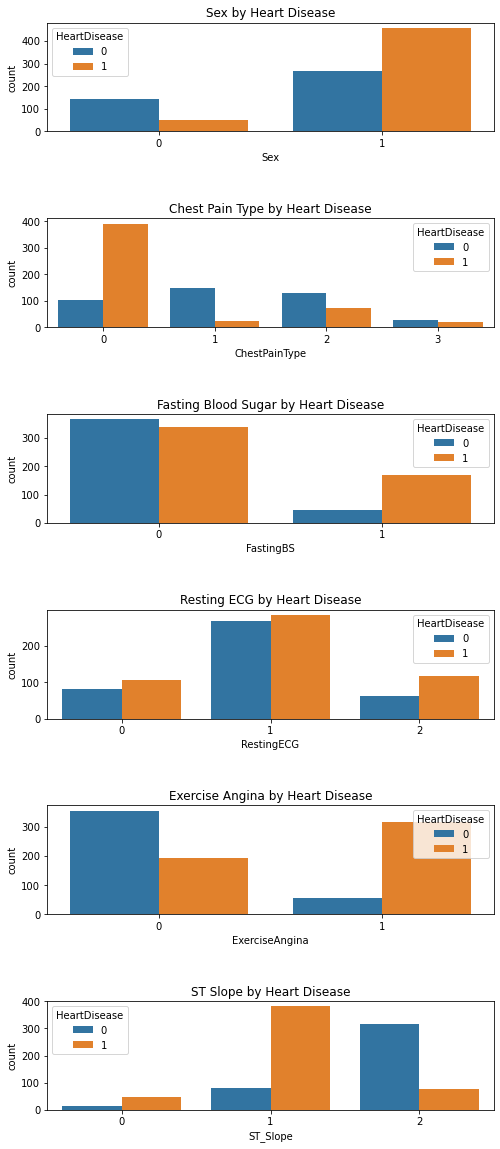

In [18]:
# Countplots to check heart disease against categorical fields
fig, axes = plt.subplots(6, figsize = (8,20))
f1 = sns.countplot(data['Sex'], hue = data['HeartDisease'], ax=axes[0])
f1.set_title("Sex by Heart Disease")
f2 = sns.countplot(data['ChestPainType'], hue = data['HeartDisease'], ax=axes[1])
f2.set_title("Chest Pain Type by Heart Disease")
f3 = sns.countplot(data['FastingBS'], hue = data['HeartDisease'], ax=axes[2])
f3.set_title("Fasting Blood Sugar by Heart Disease")
f4 = sns.countplot(data['RestingECG'], hue = data['HeartDisease'], ax=axes[3])
f4.set_title("Resting ECG by Heart Disease")
f5 = sns.countplot(data['ExerciseAngina'], hue = data['HeartDisease'], ax=axes[4])
f5.set_title("Exercise Angina by Heart Disease")
f6 = sns.countplot(data['ST_Slope'], hue = data['HeartDisease'], ax=axes[5])
f6.set_title("ST Slope by Heart Disease")
plt.subplots_adjust(hspace=0.8)
plt.show()

- Sex - larger proportion of males, males also seem to have greater risk of heart disease
- Chest pain type - high proportion of heart disease are asymptomatic
- Fasting blood sugar - seem to have greater risk of heart disease if BS > 120 mg/dl
- Resting ECG - seem to have least risk of heart disease if resting ECG is normal
- Exercise angina - seem to have much greater risk of heart disease if have angina with exercise
- ST slope - seem to have greater risk of heart disease if ST slope is flat while exercising, down sloping also has high risk but is smaller size

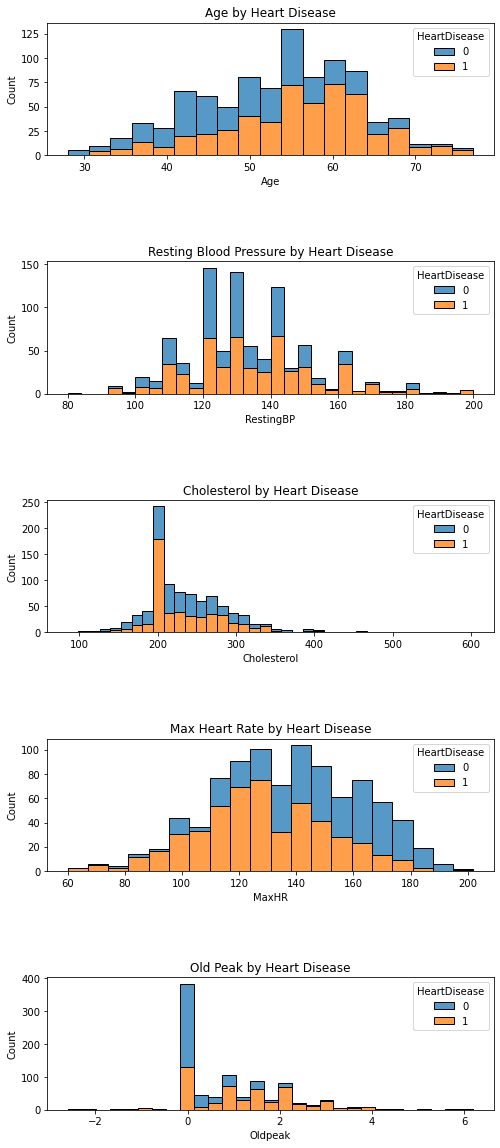

In [19]:
# Histograms to check heart disease against numerical fields
fig, axes = plt.subplots(5, figsize = (8,20))
f1 = sns.histplot(data=data, x=data['Age'], hue = data['HeartDisease'], multiple='stack', ax=axes[0])
f1.set_title("Age by Heart Disease")
f2 = sns.histplot(data=data, x=data['RestingBP'], hue = data['HeartDisease'], multiple='stack', ax=axes[1])
f2.set_title("Resting Blood Pressure by Heart Disease")
f3 = sns.histplot(data=data, x=data['Cholesterol'], hue = data['HeartDisease'], multiple='stack', ax=axes[2])
f3.set_title("Cholesterol by Heart Disease")
f4 = sns.histplot(data=data, x=data['MaxHR'], hue = data['HeartDisease'], multiple='stack', ax=axes[3])
f4.set_title("Max Heart Rate by Heart Disease")
f5 = sns.histplot(data=data, x=data['Oldpeak'], hue = data['HeartDisease'], multiple='stack', ax=axes[4])
f5.set_title("Old Peak by Heart Disease")
plt.subplots_adjust(hspace=0.8)
plt.show()

- Age - the risk of heart disease increases with age, increasing at around 56 then again at around 68
- Resting blood pressure - risk increases with resting blood pressure but this is less obvious
- Cholesterol - doesn't seem to be much correlation but risk seems to increase with cholesterol levels except very high values
- Max heart rate - there is a greater risk of heart disease when max heart rate is lower
- Old peak - there is a greater risk of heart disease when old peak is higher

In [20]:
# Defining feature and target columns
xcols = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
ycols = ['HeartDisease']
features = data[xcols]
target = data[ycols]
display(features)
display(target)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


In [21]:
# Setting and printing test and train
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=123)
print("Training Features:")
display(x_train)
print("Training Target:")
display(y_train)
print("Test Featurers:")
display(x_test)
print("Test Target:")
display(y_test)

Training Features:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
132,56,1,0,170,388,0,2,122,1,2.0,1
9,48,0,1,120,284,0,1,120,0,0.0,2
254,55,1,0,145,248,0,1,96,1,2.0,1
787,67,1,0,100,299,0,0,125,1,0.9,1
82,63,1,0,150,223,0,1,115,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
98,56,1,0,120,85,0,1,140,0,0.0,2
322,38,0,0,105,199,1,1,166,0,2.8,2
382,43,1,0,115,199,0,1,145,1,2.0,1
365,64,0,0,200,199,0,1,140,1,1.0,1


Training Target:


,HeartDisease
132,1
9,0
254,1
787,1
82,1
...,...
98,0
322,1
382,1
365,1


Test Featurers:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
349,36,1,0,110,199,1,1,125,1,1.0,1
653,42,1,2,130,180,0,1,150,0,0.0,2
7,54,1,1,110,208,0,1,142,0,0.0,2
571,69,1,0,140,110,1,1,109,1,1.5,1
171,40,1,2,140,235,0,1,188,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
263,59,1,0,130,126,0,1,125,0,0.0,1
363,56,1,0,120,199,0,2,148,0,0.0,1
232,38,0,1,120,275,0,1,129,0,0.0,2
150,39,1,1,130,215,0,1,120,0,0.0,2


Test Target:


,HeartDisease
349,1
653,0
7,0
571,1
171,0
...,...
263,1
363,1
232,0
150,0


In [22]:
# Applying standard scaler to numerical columns
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
scaler.fit(x_train[numerical_cols]) # only applying to train to avoid data leakage
# Replacing old data with transformed data from using scaler
x_train[numerical_cols] = scaler.transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

In [23]:
# Printing test and train features and targets
print("Training Features:")
display(x_train)
print("Training Target:")
display(y_train)
print("Test Featurers:")
display(x_test)
print("Test Target:")
display(y_test)

Training Features:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
132,0.290767,1,0,2.148213,2.685187,0,2,-0.608935,1,1.025585,1
9,-0.557743,0,1,-0.699394,0.846899,0,1,-0.687737,0,-0.834112,2
254,0.184703,1,0,0.724410,0.210568,0,1,-1.633361,1,1.025585,1
787,1.457468,1,0,-1.838436,1.112037,0,0,-0.490733,1,0.002752,1
82,1.033213,1,0,1.009171,-0.231328,0,1,-0.884742,0,-0.834112,1
...,...,...,...,...,...,...,...,...,...,...,...
98,0.290767,1,0,-0.699394,-2.670595,0,1,0.100282,0,-0.834112,2
322,-1.618381,0,0,-1.553676,-0.655548,1,1,1.124708,0,1.769464,2
382,-1.088062,1,0,-0.984154,-0.655548,0,1,0.297287,1,1.025585,1
365,1.139277,0,0,3.856777,-0.655548,0,1,0.100282,1,0.095737,1


Training Target:


,HeartDisease
132,1
9,0
254,1
787,1
82,1
...,...
98,0
322,1
382,1
365,1


Test Featurers:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
349,-1.830509,1,0,-1.268915,-0.655548,1,1,-0.490733,1,0.095737,1
653,-1.194126,1,2,-0.129872,-0.991389,0,1,0.494292,0,-0.834112,2
7,0.078639,1,1,-1.268915,-0.496466,0,1,0.179084,0,-0.834112,2
571,1.669596,1,0,0.439649,-2.228699,1,1,-1.121148,1,0.560661,1
171,-1.406254,1,2,0.439649,-0.019218,0,1,1.991530,0,-0.834112,2
...,...,...,...,...,...,...,...,...,...,...,...
263,0.608958,1,0,-0.129872,-1.945885,0,1,-0.490733,0,-0.834112,1
363,0.290767,1,0,-0.699394,-0.655548,0,2,0.415490,0,-0.834112,1
232,-1.618381,0,1,-0.699394,0.687816,0,1,-0.333129,0,-0.834112,2
150,-1.512317,1,1,-0.129872,-0.372735,0,1,-0.687737,0,-0.834112,2


Test Target:


,HeartDisease
349,1
653,0
7,0
571,1
171,0
...,...
263,1
363,1
232,0
150,0


### Decision Tree

In [ ]:
# Create and fit decision tree model
dt1_classifier = DecisionTreeClassifier(random_state=1)
dt1_classifier.fit(x_train, y_train)
# Predict test set using decision tree model
y_predicted_dt1 = dt1_classifier.predict(x_test)

# Finding classification metrics for decision tree model
dt1_acc = accuracy_score(y_test, y_predicted_dt1)
dt1_rec = recall_score(y_test, y_predicted_dt1) # good to look at when aim to minimise false negatives
dt1_cm = confusion_matrix(y_test, y_predicted_dt1)

# Printing classification metrics and confusion matrix
print(f'Accuracy = {dt1_acc:.3f}')
print(f'Recall = {dt1_rec:.3f}')
dt1_cm_display = ConfusionMatrixDisplay(dt1_cm)
dt1_cm_display.plot()

Checking accuracy and recall metrics as want to be as accurate as possible and minimise false negatives. Fairly high proportion are predicting correctly with smallest amount of predictions being false negative 

#### Parameter Optimisation

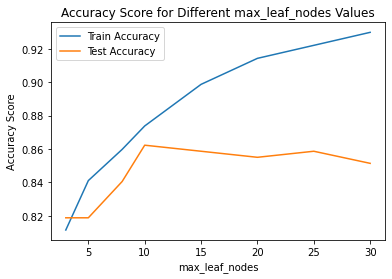

In [25]:
# Finding best number to put as max_leaf_nodes from accuracy scores - to avoid overfitting
max_leaf_nodes_values = [None, 3, 5, 8, 10, 15, 20, 25, 30] # max_leaf_nodes to test
train_acc_scores = []
test_acc_scores = [] # Lists to store accuracy scores

for max_leaf_nodes in max_leaf_nodes_values:
    # Create and fit decision tree model for each max_leaf_node value
    dt2_classifier = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    dt2_classifier.fit(x_train, y_train)
    # Predict train and test sets
    y_train_predicted = dt2_classifier.predict(x_train)
    y_test_predicted = dt2_classifier.predict(x_test)
    # Finding accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_predicted)
    test_accuracy = accuracy_score(y_test, y_test_predicted)
    # Append scores to lists
    train_acc_scores.append(train_accuracy)
    test_acc_scores.append(test_accuracy)

# Plot the accuracy scores
plt.plot(max_leaf_nodes_values, train_acc_scores, label='Train Accuracy')
plt.plot(max_leaf_nodes_values, test_acc_scores, label='Test Accuracy')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different max_leaf_nodes Values')
plt.legend()
plt.show()

Can see accuracy score is highest for the test set when max_leaf_nodes set as 10, after this it decreases, suggesting the model becomes overfitted

Accuracy = 0.862
Recall = 0.936


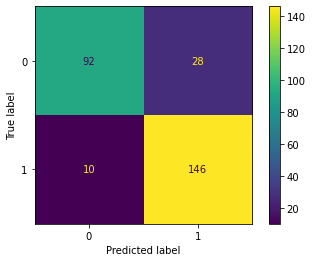

In [26]:
# Create and fit decision tree model using optimal max_leaf_nodes
dt3_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=1)
dt3_classifier.fit(x_train, y_train)
# Predict test set using decision tree model
y_predicted_dt3 = dt3_classifier.predict(x_test)

# Finding classification metrics for decision tree model
dt3_acc = accuracy_score(y_test, y_predicted_dt3)
dt3_rec = recall_score(y_test, y_predicted_dt3)
dt3_cm = confusion_matrix(y_test, y_predicted_dt3)

# Printing classification metrics and confusion matrix
print(f'Accuracy = {dt3_acc:.3f}')
print(f'Recall = {dt3_rec:.3f}') # good to look at when aim to minimise false negatives
dt3_cm_display = ConfusionMatrixDisplay(dt3_cm)
dt3_cm_display.plot()

Can see performs better for both accuracy and recall measures using max_leaf_nodes=10, therefore, model is more accurate and false negatives more greatly reduced

#### Feature Selection

In [27]:
# Ranking features by importance on the model
dt_features = pd.DataFrame({'Feature':x_train.columns, 'Importance':dt3_classifier.feature_importances_})
dt_features.sort_values(by='Importance', ascending=False)

,Feature,Importance
10,ST_Slope,0.632723
2,ChestPainType,0.111859
9,Oldpeak,0.076048
1,Sex,0.073860
7,MaxHR,0.039055
8,ExerciseAngina,0.023775
3,RestingBP,0.022323
5,FastingBS,0.020358
0,Age,0.000000
4,Cholesterol,0.000000


In [28]:
# Removing columns which were found to have no impact on model
x_train_rem = x_train.drop(columns=['Age', 'Cholesterol', 'RestingECG'])
x_test_rem = x_test.drop(columns=['Age', 'Cholesterol', 'RestingECG'])
x_test_rem.columns

Index(['Sex', 'ChestPainType', 'RestingBP', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

Accuracy = 0.862
Recall = 0.936


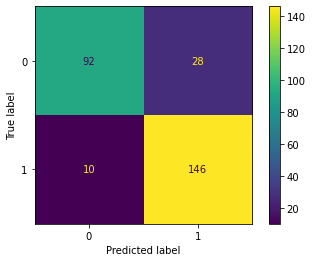

In [29]:
# Create and fit decision tree model with removed features and optimal max_leaf_nodes
dt4_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=1)
dt4_classifier.fit(x_train_rem, y_train)
# Predict test set using decision tree model
y_predicted_dt4 = dt4_classifier.predict(x_test_rem)

# Finding classification metrics for decision tree model
dt4_acc = accuracy_score(y_test, y_predicted_dt4)
dt4_rec = recall_score(y_test, y_predicted_dt4)
dt4_cm = confusion_matrix(y_test, y_predicted_dt4)

# Printing classification metrics and confusion matrix
print(f'Accuracy = {dt4_acc:.3f}')
print(f'Recall = {dt4_rec:.3f}') # good to look at when aim to minimise false negatives
dt4_cm_display = ConfusionMatrixDisplay(dt4_cm)
dt4_cm_display.plot()

### KNN

Accuracy = 0.819
Recall = 0.833


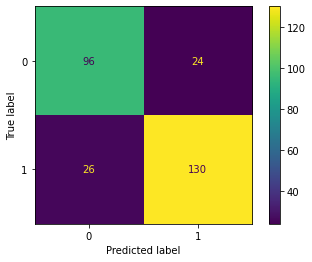

In [30]:
# Implementing knn using default of n_neighbors=5
knn1_classifier = KNeighborsClassifier()
knn1_classifier.fit(x_train, y_train)
# Predict test set using knn model
y_predicted_knn1 = knn1_classifier.predict(x_test)

# Finding classification metrics for knn model
knn1_acc = accuracy_score(y_test, y_predicted_knn1)
knn1_rec = recall_score(y_test, y_predicted_knn1)
knn1_cm = confusion_matrix(y_test, y_predicted_knn1)

# Printing classification metrics and confusion matrix
print(f'Accuracy = {knn1_acc:.3f}')
print(f'Recall = {knn1_rec:.3f}') # good to look at when aim to minimise false negatives
knn1_cm_display = ConfusionMatrixDisplay(knn1_cm)
knn1_cm_display.plot()

#### Parameter Optimisation

Best Parameters = {'n_neighbors': 15}
Accuracy = 0.837
Recall = 0.833


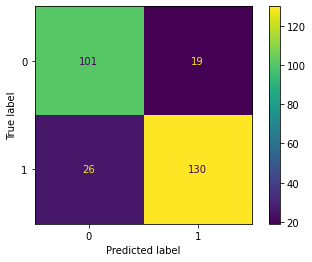

In [31]:
# Using grid search method to find best value for n_neighbors
nums = []
for i in range(1,30):
    if i % 2 != 0:
        nums.append(i) # Only finding for odd numbers so can't be balanced
params = {'n_neighbors': nums}
kkn2_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(kkn2_classifier, params, cv = 5, scoring = 'accuracy')
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
# Predict test set using knn model
y_predicted_knn2 = best_model.predict(x_test)

# Finding classisifcation metrics for knn model
knn2_acc = accuracy_score(y_test, y_predicted_knn2)
knn2_rec = recall_score(y_test, y_predicted_knn2)
knn2_cm = confusion_matrix(y_test, y_predicted_knn2)

# Printing classification metrics and confusion matrix
print(f'Best Parameters = {best_params}')
print(f'Accuracy = {knn2_acc:.3f}')
print(f'Recall = {knn2_rec:.3f}') # good to look at when aim to minimise false negatives
knn2_cm_display = ConfusionMatrixDisplay(knn2_cm)
knn2_cm_display.plot()

Performs better with n_neighbors of 15 than does with 5 for accuracy and performs the same for recall

#### Feature Selection

In [33]:
# Removing columns found to have least correlation from feature/target plots in data exploration
x_train_rem_knn = x_train.drop(columns=['Age', 'Cholesterol', 'RestingBP', 'RestingECG'])
x_test_rem_knn = x_test.drop(columns=['Age', 'Cholesterol', 'RestingBP', 'RestingECG'])
x_test_rem_knn.columns

Index(['Sex', 'ChestPainType', 'FastingBS', 'MaxHR', 'ExerciseAngina',
       'Oldpeak', 'ST_Slope'],
      dtype='object')

Accuracy = 0.851
Recall = 0.891


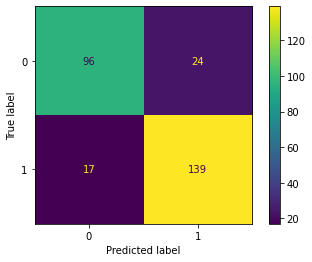

In [34]:
# Implementing knn using n_neighbors=15 and removing least valuable features
knn3_classifier = KNeighborsClassifier(n_neighbors=15)
knn3_classifier.fit(x_train_rem_knn, y_train)
# Predict test set using knn model
y_predicted_knn3 = knn3_classifier.predict(x_test_rem_knn)

# Finding classisifcation metrics for knn model
knn3_acc = accuracy_score(y_test, y_predicted_knn3)
knn3_rec = recall_score(y_test, y_predicted_knn3)
knn3_cm = confusion_matrix(y_test, y_predicted_knn3)

# Printing classification metrics and confusion matrix
print(f'Accuracy = {knn3_acc:.3f}')
print(f'Recall = {knn3_rec:.3f}') # good to look at when aim to minimise false negatives
knn3_cm_display = ConfusionMatrixDisplay(knn3_cm)
knn3_cm_display.plot()

Removing 'Age', 'Cholesterol', 'RestingBP' and 'RestingECG' columns gives better knn scores. These still don't perform as well as the best performing decision tree model

#### The best performing model overall was the decision tree model with max_leaf_nodes=10 and removed 'Age', 'Cholesterol', 'RestingECG' features. Giving Accuracy = 0.862 and Recall = 0.936.